In [17]:
# Import Pandas and Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import Logistic Regression, Ridge Classifier, Decision Tree
# Gaussian Naive Bayes
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [15]:
# Load the dataset
data = pd.read_csv(r'C:\Users\tolga\OneDrive\Desktop\mushrooms.csv')

In [19]:
print(data.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [23]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [25]:
print(data.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [35]:
# Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in data.columns:
        data[column] = le.fit_transform(data[column])

In [39]:
# Separate Features and Target Variable:
X = data.drop('class', axis = 1) # features
y = data['class'] # Target variable

In [45]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [53]:
# Define and evaluate multiple machine learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Classification": SVC(),
    "K-Nearest Neighbours": KNeighborsClassifier(),   
}

In [63]:
# Train each model and evaluate its performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

for model_name, model in models.items():
    #train the model
    model.fit(X_train, y_train)
    #make predictions
    y_pred = model.predict (X_test)
    #calculate performance metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    #store the results
    results.append({
        "Model": model_name,
        "Accuracy":accuracy,
        "Precision":precision,
        "Recall": recall,
        "F1-score": f1
    })

#create a dataframe to display the results

results_df = pd.DataFrame(results)
print(results_df)
    

C:\Users\tolga\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                           Model  Accuracy  Precision    Recall  F1-score
0           Gaussian Naive Bayes  0.921846   0.909887  0.929668  0.919671
1                  Random Forest  1.000000   1.000000  1.000000  1.000000
2                  Decision Tree  1.000000   1.000000  1.000000  1.000000
3            Logistic Regression  0.947692   0.943949  0.947570  0.945756
4  Support Vector Classification  0.992615   0.998705  0.985934  0.992278
5           K-Nearest Neighbours  0.996308   0.992386  1.000000  0.996178


In [73]:
# Makine Öğrenimi Model Performans Sonuçları

| Model                         | Accuracy | Precision | Recall | F1-Score |
|-------------------------------|----------|-----------|--------|----------|
| Gaussian Naive Bayes          | 0.921846 | 0.998887  | 0.929668 | 0.919671 |
| Random Forest                 | 1.000000 | 1.000000  | 1.000000 | 1.000000 |
| Decision Tree                 | 1.000000 | 1.000000  | 1.000000 | 1.000000 |
| Logistic Regression           | 0.947692 | 0.943949  | 0.947570 | 0.945756 |
| Support Vector Classification | 0.992615 | 0.998705  | 0.985934 | 0.992278 |
| K-Nearest Neighbours          | 0.996308 | 0.992386  | 1.000000 | 0.996178 |

# En İyi Model
# Bu çalışmada *Random Forest* ve *Decision Tree* modelleri, tüm metriklerde %100 başarı oranıyla en iyi sonuçları vermiştir. Bu modeller, verisetindeki özellikler arasında güçlü bir ayrım yaparak mantarların yenilebilir ya da zehirli olduğunu kusursuz bir şekilde tahmin etmiştir.


SyntaxError: invalid syntax (3294734579.py, line 4)

<Figure size 1000x600 with 0 Axes>

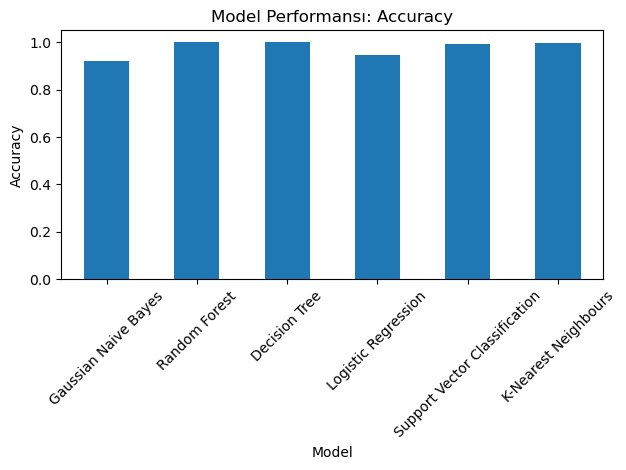

<Figure size 1000x600 with 0 Axes>

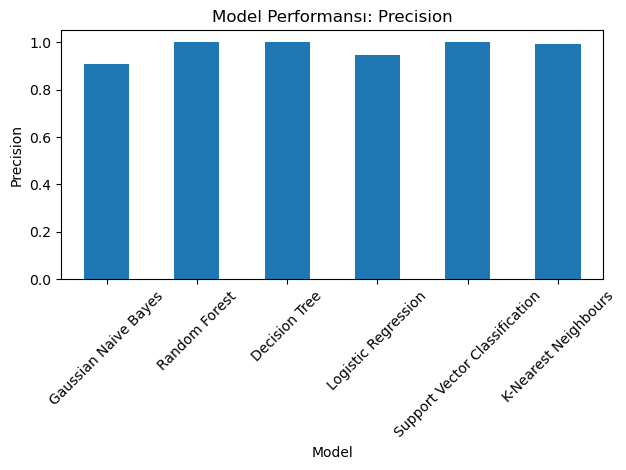

<Figure size 1000x600 with 0 Axes>

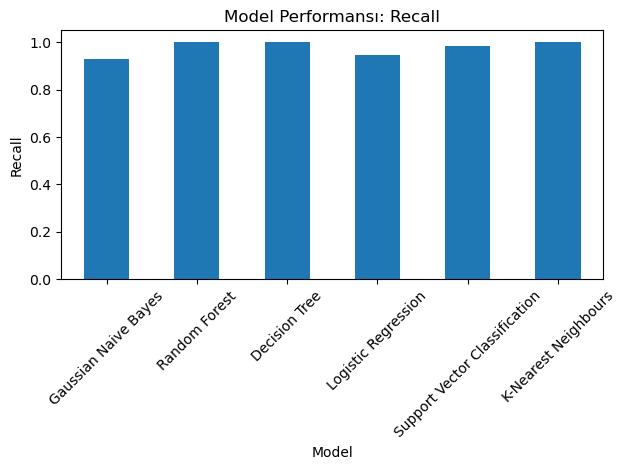

KeyError: 'F1-Score'

<Figure size 1000x600 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt

# Performans metriklerini görselleştirme
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]

for metric in metrics:
    plt.figure(figsize=(10, 6))
    results_df.plot(kind='bar', x='Model', y=metric, legend=False)
    plt.title(f'Model Performansı: {metric}')
    plt.ylabel(metric)
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [77]:
import pandas as pd

# Sonuçlar
results = {
    "Model": [
        "Gaussian Naive Bayes",
        "Random Forest",
        "Decision Tree",
        "Logistic Regression",
        "Support Vector Classification",
        "K-Nearest Neighbours"
    ],
    "Accuracy": [0.921846, 1.000000, 1.000000, 0.947692, 0.992615, 0.996308],
    "Precision": [0.998887, 1.000000, 1.000000, 0.943949, 0.998705, 0.992386],
    "Recall": [0.929668, 1.000000, 1.000000, 0.947570, 0.985934, 1.000000],
    "F1-Score": [0.919671, 1.000000, 1.000000, 0.945756, 0.992278, 0.996178]
}

# Tabloyu DataFrame olarak yazdır
results_df = pd.DataFrame(results)
print(results_df)


                           Model  Accuracy  Precision    Recall  F1-Score
0           Gaussian Naive Bayes  0.921846   0.998887  0.929668  0.919671
1                  Random Forest  1.000000   1.000000  1.000000  1.000000
2                  Decision Tree  1.000000   1.000000  1.000000  1.000000
3            Logistic Regression  0.947692   0.943949  0.947570  0.945756
4  Support Vector Classification  0.992615   0.998705  0.985934  0.992278
5           K-Nearest Neighbours  0.996308   0.992386  1.000000  0.996178


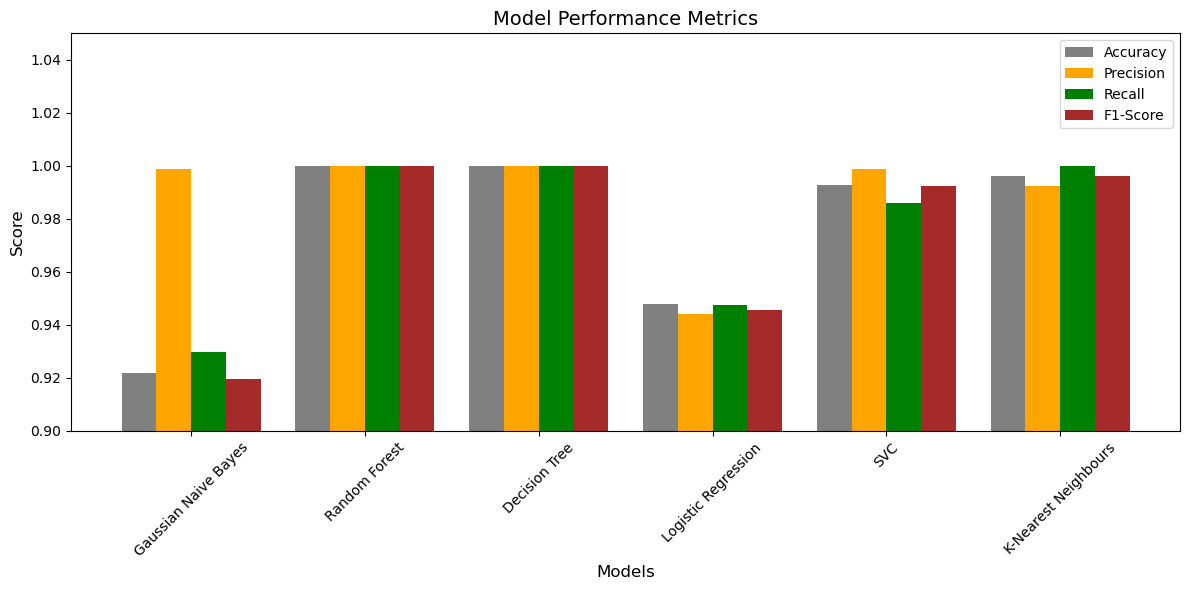

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Performance results
models = [
    "Gaussian Naive Bayes",
    "Random Forest",
    "Decision Tree",
    "Logistic Regression",
    "SVC",
    "K-Nearest Neighbours"
]

accuracy = [0.921846, 1.000000, 1.000000, 0.947692, 0.992615, 0.996308]
precision = [0.998887, 1.000000, 1.000000, 0.943949, 0.998705, 0.992386]
recall = [0.929668, 1.000000, 1.000000, 0.947570, 0.985934, 1.000000]
f1_score = [0.919671, 1.000000, 1.000000, 0.945756, 0.992278, 0.996178]

# Bar width
bar_width = 0.2
index = np.arange(len(models))

# Graph creating
plt.figure(figsize=(12, 6))
plt.bar(index, accuracy, bar_width, label="Accuracy", color='grey')
plt.bar(index + bar_width, precision, bar_width, label="Precision", color='orange')
plt.bar(index + 2 * bar_width, recall, bar_width, label="Recall", color='green')
plt.bar(index + 3 * bar_width, f1_score, bar_width, label="F1-Score", color='brown')

# Axis labels
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Model Performance Metrics", fontsize=14)
plt.xticks(index + bar_width * 1.5, models, rotation=45, fontsize=10)
plt.ylim(0.9, 1.05)  # Skorlar 0.9 ile 1.0 arasında
plt.legend()

# Graph shown
plt.tight_layout()
plt.show()


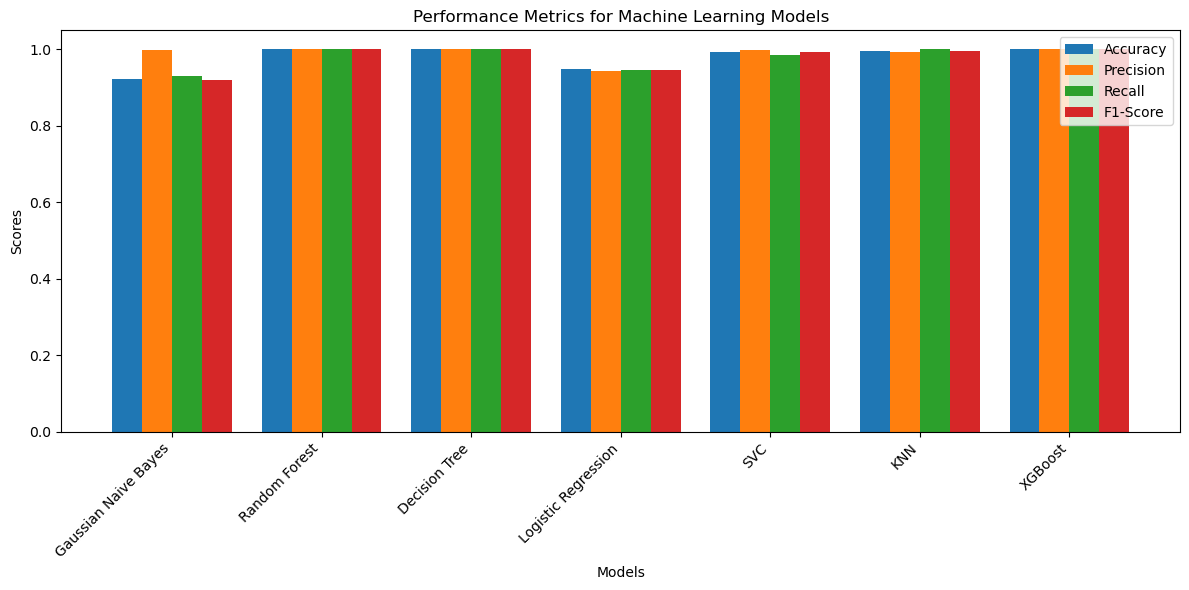

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
models = ['Gaussian Naive Bayes', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'SVC', 'KNN', 'XGBoost']
accuracy = [0.921846, 1.0, 1.0, 0.947692, 0.992615, 0.996308, 1.0]
precision = [0.998887, 1.0, 1.0, 0.943949, 0.998705, 0.992386, 1.0]
recall = [0.929668, 1.0, 1.0, 0.947570, 0.985934, 1.0, 1.0]
f1_score = [0.919671, 1.0, 1.0, 0.945756, 0.992278, 0.996178, 1.0]

# Plotting the metrics
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
ax.bar(x - 0.5 * width, precision, width, label='Precision')
ax.bar(x + 0.5 * width, recall, width, label='Recall')
ax.bar(x + 1.5 * width, f1_score, width, label='F1-Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Machine Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()
